In [1]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.utils import np_utils
# from keras.callbacks import Callback

Using TensorFlow backend.


In [2]:
# 不加载vgg
batch_size = 8
train_datagen = ImageDataGenerator(rescale=1/255.,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1/255.)


train_generator = train_datagen.flow_from_directory('./data/train/',
                                                   target_size=(400,400),
                                                    batch_size=batch_size,
                                                    class_mode='categorical'
                                                   )
validation_generator = val_datagen.flow_from_directory('./data/vialid/',
                                                      target_size=(400,400),
                                                       batch_size=batch_size,
                                                       class_mode='categorical'
                                                      )

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(400,400,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
# epochs=20
# lrate=0.01
# decay = lrate/epochs
# sgd = SG

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit_generator(train_generator,samples_per_epoch=10000,epochs=20,
                   validation_data=validation_generator,validation_steps=8)

Found 12033 images belonging to 2 classes.
Found 1338 images belonging to 2 classes.


/home/xms/.virtualenvs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:42: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=1250, validation_steps=8, epochs=20, validation_data=<keras.pre...)`


Epoch 1/20
1250/1250 [==============================] - 2623s 2s/step - loss: 0.5624 - acc: 0.7321 - val_loss: 0.5020 - val_acc: 0.6719
Epoch 2/20
1250/1250 [==============================] - 2593s 2s/step - loss: 0.5060 - acc: 0.7687 - val_loss: 0.4673 - val_acc: 0.8125
Epoch 3/20
1250/1250 [==============================] - 2627s 2s/step - loss: 0.4933 - acc: 0.7763 - val_loss: 0.4291 - val_acc: 0.8438
Epoch 4/20
1250/1250 [==============================] - 2674s 2s/step - loss: 0.4664 - acc: 0.7935 - val_loss: 0.4180 - val_acc: 0.8438
Epoch 5/20
1250/1250 [==============================] - 2594s 2s/step - loss: 0.4466 - acc: 0.8003 - val_loss: 0.4937 - val_acc: 0.7656
Epoch 6/20
1250/1250 [==============================] - 2720s 2s/step - loss: 0.4388 - acc: 0.8077 - val_loss: 0.4806 - val_acc: 0.7344
Epoch 7/20
1250/1250 [==============================] - 2610s 2s/step - loss: 0.4301 - acc: 0.8117 - val_loss: 0.3859 - val_acc: 0.7969
Epoch 8/20
1250/1250 [==========================

KeyboardInterrupt: 

In [4]:
import numpy as np
model = applications.VGG16(include_top=False,weights='imagenet')
datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# import time
# from PIL import Image
generator = datagen.flow_from_directory('./data/train/',
                                       target_size=(224,224),
                                        batch_size=2,
                                        class_mode=None,
                                        shuffle=False
                                       )

bottleneck_features_train = model.predict_generator(generator,5636)
np.save(open('./vgg/bottleneck_features_train.npy','wb'),bottleneck_features_train)

generator = datagen.flow_from_directory('./data/vialid/',
                                       target_size=(224,224),
                                        batch_size=2,
                                        class_mode=None,
                                        shuffle=False
                                       )

bottleneck_features_vialid = model.predict_generator(generator,623)
np.save(open('./vgg/bottleneck_features_vilad.npy','wb'),bottleneck_features_vialid)


Found 11272 images belonging to 2 classes.
Found 1246 images belonging to 2 classes.


In [7]:
from matplotlib import pyplot as plt
def plot_training(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs,acc,'b-')
    plt.plot(epochs,val_acc,'r')
    plt.title('Training and validation accuracy')
    plt.figure()
    plt.plot(epochs,loss,'b-')
    plt.plot(epochs,val_loss,'r')
    plt.title('Training and validation loss')
    plt.show()

Train on 11272 samples, validate on 1246 samples
Epoch 1/200
11272/11272 [==============================] - 82s 7ms/step - loss: 0.4256 - acc: 0.8074 - val_loss: 0.4612 - val_acc: 0.7721
Epoch 2/200
11272/11272 [==============================] - 81s 7ms/step - loss: 0.3202 - acc: 0.8628 - val_loss: 0.2910 - val_acc: 0.8539
Epoch 3/200
11272/11272 [==============================] - 81s 7ms/step - loss: 0.2767 - acc: 0.8829 - val_loss: 0.2342 - val_acc: 0.9013
Epoch 4/200
11272/11272 [==============================] - 81s 7ms/step - loss: 0.2547 - acc: 0.8933 - val_loss: 0.2490 - val_acc: 0.8933
Epoch 5/200
11272/11272 [==============================] - 82s 7ms/step - loss: 0.2344 - acc: 0.9051 - val_loss: 0.3033 - val_acc: 0.8844
Epoch 6/200
11272/11272 [==============================] - 82s 7ms/step - loss: 0.2171 - acc: 0.9147 - val_loss: 0.2216 - val_acc: 0.9061
Epoch 7/200
11272/11272 [==============================] - 82s 7ms/step - loss: 0.2022 - acc: 0.9214 - val_loss: 0.2227 - v

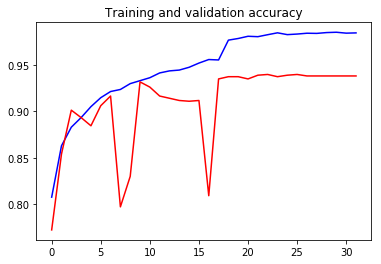

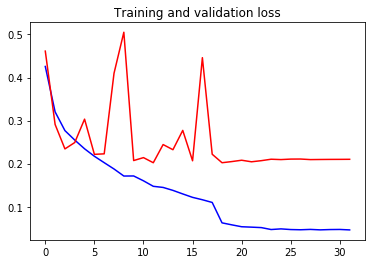

In [11]:
import os
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras import optimizers


early_stoping = EarlyStopping(monitor='val_loss',patience=20,verbose=2)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=5,mode='auto')

train_data = np.load('vgg/bottleneck_features_train.npy')

# print(train_data.shape)
train_labels = np.array([1]*5636+[0]*5636)

validation_data = np.load('vgg/bottleneck_features_vilad.npy')
validation_label = np.array([1]*623+[0]*623)


model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
# rmsprop = optimizers.rmsprop(lr=0.001)

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data,train_labels,
          validation_data=(validation_data,validation_label[:validation_data.shape[0]]),
         epochs=200,
          batch_size=16,
          callbacks=[early_stoping,reduce_lr]

         )
plot_training(history)

In [14]:
import os
from PIL import Image

vgg = applications.VGG16(include_top=False,weights='imagenet')


def prediction_cla(file):
    data_list = os.listdir(file)
    #     print(data_list)
    for i in data_list:
        if i[:2] == '30':
            img = Image.open(file+'/'+i)
            img = img.convert('RGB')
            img = img.resize((224,224),Image.ANTIALIAS)
            img = np.array([np.array(img)])/255
            x = vgg.predict(img)
            result = model.predict_proba(x)
            value = str(result[0][0])
#             print(x.shape)
#             print(model.predict_proba(img))
            with open('reuslt.csv','a+') as f:
                if data_list.index(i) == 0:
                    f.write('pic_id,pred'+'\n')
                    f.write('pic_'+i.replace('.jpg','')+','+value+'\n')
                else:
                    f.write('pic_'+i.replace('.jpg','')+','+value+'\n')

    
prediction_cla('Test_B/Test_B')